<a href="https://colab.research.google.com/github/tcotte/CNN_Pytorch/blob/master/different_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/tcotte/CNN_Pytorch
%cd CNN_Pytorch

fatal: destination path 'CNN_Pytorch' already exists and is not an empty directory.
/content/CNN_Pytorch/CNN_Pytorch


In [10]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

if cuda:
    torch.cuda.manual_seed(SEED)

### Transformations

In [11]:
from torchvision import transforms

AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

NetTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))                               
])

### Load dataset

In [12]:
import os
import torchvision

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size=256
dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')

# Load the dataset for alexnet arch
train_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= AlexTransform,
                                           download=True)

test_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= AlexTransform,
                                           download=True)

train_loader_alex = torch.utils.data.DataLoader(dataset=train_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_alex = torch.utils.data.DataLoader(dataset=test_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)
# Load the dataset for lenet arch
train_dataset_lenet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= NetTransform,
                                           download=True)

test_dataset_lenet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= NetTransform,
                                           download=True)

train_loader_lenet = torch.utils.data.DataLoader(dataset=train_dataset_lenet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_lenet = torch.utils.data.DataLoader(dataset=test_dataset_lenet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

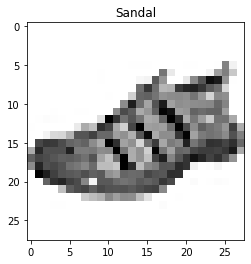

In [13]:
from functions.plot_picture import matplotlib_imshow

# get some random training images
dataiter = iter(train_loader_lenet)

images, labels = dataiter.next()

# # creat grid of images
img_grid = torchvision.utils.make_grid(images[0])

# # show images & labels
matplotlib_imshow(img_grid, class_names[labels[0]])

### Train all models on 10 epochs

In [14]:
from functions.training import train_model, evaluate_model
from models.alexnet_arch import AlexNet
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_an = []
accuracies_an = []
nb_batch = int(np.ceil(len(train_loader_alex.dataset)/batch_size))

alexnet_model = AlexNet()

optimizer = optim.Adam(alexnet_model.parameters(),  lr=0.001)

alexnet_model.to(device)

for epoch in range(EPOCHS):
  losses_an.extend(train_model(train_loader_alex, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_an.append(evaluate_model(alexnet_model, device, test_loader_alex, losses_an[-1], EPOCHS, epoch, batch_size, len(train_loader_alex.dataset)))

 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.443634	 Test Accuracy: 82.0500%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.506564	 Test Accuracy: 85.1100%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.468073	 Test Accuracy: 85.5600%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.445185	 Test Accuracy: 86.2700%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.276765	 Test Accuracy: 86.9000%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.370366	 Test Accuracy: 86.8500%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.423889	 Test Accuracy: 88.1300%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.251775	 Test Accuracy: 87.9700%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.204406	 Test Accuracy: 88.2900%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.372553	 Test Accuracy: 88.1100%


In [42]:
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_ln = []
accuracies_ln = []

lenet_model = Model_Type_LeNet()

optimizer = optim.Adam(lenet_model.parameters(),  lr=0.001)

lenet_model.to(device)

for epoch in range(EPOCHS):
  losses_ln.extend(train_model(train_loader_lenet, device, lenet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_ln.append(evaluate_model(lenet_model, device, test_loader_lenet, losses_ln[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/content/CNN_Pytorch/models/lenet_arch.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  sm = nn.functional.log_softmax(out, _stacklevel=3)


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.350902	 Test Accuracy: 80.6600%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.400435	 Test Accuracy: 85.6100%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.230002	 Test Accuracy: 86.4000%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.337038	 Test Accuracy: 87.1300%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.391392	 Test Accuracy: 87.5700%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.363224	 Test Accuracy: 88.4400%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.371106	 Test Accuracy: 87.8600%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.180297	 Test Accuracy: 88.5100%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.310463	 Test Accuracy: 89.0000%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 87.7500%


### Dataframes

In [31]:
losses_ln[234+235]

0.4228805601596832

In [32]:
def filter_losses(losses, EPOCHS):
  losses_filtered = []
  for i in range(EPOCHS):
    if i==0:
      losses_filtered.append(losses[nb_batch-1])
    else:
      losses_filtered.append(losses[nb_batch-1+nb_batch*i])
  return losses_filtered

In [33]:
len(accuracies_ln)

10

In [34]:
import pandas as pd 

d = {('AlexNet architecture', 'accuracy'): accuracies_an,
     ('AlexNet architecture', 'loss'): filter_losses(losses_an, EPOCHS),
     ('LeNet architecture','accuracy'): accuracies_ln,
     ('LeNet architecture','loss'): filter_losses(losses_ln, EPOCHS)
}
l=[('AlexNet architecture', 'accuracy'),  ('AlexNet architecture', 'loss'), ('LeNet architecture','accuracy'),  ('LeNet architecture','loss')]
df = pd.DataFrame(data=d, columns = l)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['',''])
df

AlexNet architecture           LeNet architecture          
              accuracy      loss           accuracy      loss
0               0.8205  0.443634             0.8118  0.485583
1               0.8511  0.506564             0.8507  0.422881
2               0.8556  0.468073             0.8597  0.387924
3               0.8627  0.445185             0.8748  0.445230
4               0.8690  0.276765             0.8745  0.222180
5               0.8685  0.370366             0.8725  0.254469
6               0.8813  0.423889             0.8768  0.369434
7               0.8797  0.251775             0.8605  0.273147
8               0.8829  0.204406             0.8762  0.402334
9               0.8811  0.372553             0.8729  0.213760

In [35]:
#Save the df
df.to_csv('csv/differences_on_fashion.csv')


No handles with labels found to put in legend.


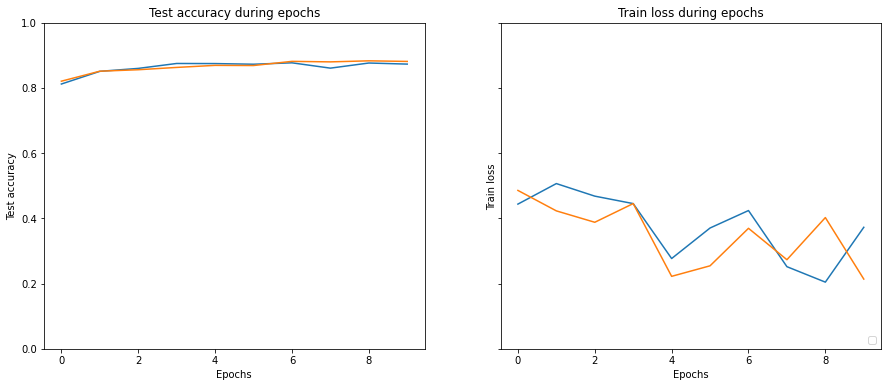

In [36]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))

ax1.plot(np.arange(EPOCHS), accuracies_ln)
ax1.plot(np.arange(EPOCHS), accuracies_an)
ax2.plot(np.arange(EPOCHS), filter_losses(losses_an, EPOCHS))
ax2.plot(np.arange(EPOCHS), filter_losses(losses_ln, EPOCHS))
plt.ylim(0,1)
ax1.set_title("Test accuracy during epochs")
ax2.set_title("Train loss during epochs")

for ax in [ax1, ax2]:
  ax.set_xlabel("Epochs")

ax1.set_ylabel("Test accuracy")
ax2.set_ylabel("Train loss")

plt.legend(loc='lower right')

###Differences between maxpooling and avgpooling

In [37]:
class Model_Max_Pool(nn.Module):
    def __init__(self):
        super(Model_Max_Pool, self).__init__()
        # use nn.Sequential() for each layer1 and layer2, with nn.Conv2d + nn.ReLU + nn.MaxPool2d
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5)),  # output dimension = (28-5+1)*24*6= 2187
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = ((24-2)%2+1)*12*6 =
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5)),  # output dimension = (12-5+1)*8*16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = ((8-2)%2+1)*4*16 = 256
        )
        # use nn.Linear with 1000 neurons
        self.fc1 = nn.Linear(256, 1000)
        # use nn.Linear to output a one hot vector to encode the output
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # print(out.size())
        # use reshape() to match the input of the FC layer1
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        # use F.log_softmax() to normalize the output
        sm = nn.functional.log_softmax(out, _stacklevel=3)
        return sm

In [43]:
losses_max = []
accuracies_max = []

model = Model_Max_Pool()

optimizer = optim.Adam(model.parameters(),  lr=0.001)


model.to(device)

for epoch in range(EPOCHS):
  losses_max.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_max.append(evaluate_model(model, device, test_loader_lenet, losses_ln[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 82.7400%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 85.9500%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 85.9600%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 86.7500%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 87.6400%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 88.1600%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 87.3400%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 87.6600%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 88.1000%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.241920	 Test Accuracy: 87.7500%


In [41]:
len(losses_max)

0

In [44]:
import pandas as pd 

d = {('Max pooling', 'accuracy'): accuracies_max,
     ('Max pooling', 'loss'): filter_losses(losses_max, EPOCHS),
     ('Average pooling','accuracy'): accuracies_ln,
     ('Average pooling','loss'): filter_losses(losses_ln, EPOCHS)
}
l=[('Max pooling', 'accuracy'),  ('Max pooling', 'loss'), ('LeNet architecture','accuracy'),  ('LeNet architecture','loss')]
df = pd.DataFrame(data=d, columns = l)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['',''])

### Model with multiples fully connected layers

In [45]:
class Model_Multiple_fc(nn.Module):
    def __init__(self):
        super(Model_Multiple_fc, self).__init__()
        # use nn.Sequential() for each layer1 and layer2, with nn.Conv2d + nn.ReLU + nn.MaxPool2d
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5)),  # output dimension = (28-5+1)*24*6= 2187
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = ((24-2)%2+1)*12*6 =
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5)),  # output dimension = (12-5+1)*8*16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = ((8-2)%2+1)*4*16 = 256
        )
        # use nn.Linear with 1000 neurons
        self.fc1 = nn.Linear(256, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 1000)
        self.fc4 = nn.Linear(1000, 1000)
        self.fc5 = nn.Linear(1000, 1000)
        # use nn.Linear to output a one hot vector to encode the output
        self.fc6 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # print(out.size())
        # use reshape() to match the input of the FC layer1
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)
        out = self.fc6(out)      
        # use F.log_softmax() to normalize the output
        sm = nn.functional.log_softmax(out, _stacklevel=3)
        return sm

In [46]:
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_m_fc = []
accuracies_m_fc = []

model = Model_Multiple_fc()

optimizer = optim.Adam(model.parameters(),  lr=0.001)

model.to(device)

for epoch in range(EPOCHS):
  losses_m_fc.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_m_fc.append(evaluate_model(model, device, test_loader_lenet, losses_m_fc[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.536575	 Test Accuracy: 76.9600%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.600258	 Test Accuracy: 80.7100%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 2.315520	 Test Accuracy: 10.0000%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 2.296529	 Test Accuracy: 10.0000%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 2.300209	 Test Accuracy: 10.0000%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 2.300910	 Test Accuracy: 10.0000%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 2.383002	 Test Accuracy: 10.0000%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 2.318822	 Test Accuracy: 10.0000%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 2.311397	 Test Accuracy: 10.0000%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 2.331974	 Test Accuracy: 10.0000%


###One large fully connected layer

In [57]:
class Model_Big_fc(nn.Module):
    def __init__(self):
        super(Model_Big_fc, self).__init__()
        # use nn.Sequential() for each layer1 and layer2, with nn.Conv2d + nn.ReLU + nn.MaxPool2d
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5)),  # output dimension = (28-5+1)*24*6= 2187
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = ((24-2)%2+1)*12*6 =
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5)),  # output dimension = (12-5+1)*8*16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = ((8-2)%2+1)*4*16 = 256
        )
        # use nn.Linear with 1000 neurons
        self.fc1 = nn.Linear(256, 100000)
        # use nn.Linear to output a one hot vector to encode the output
        self.fc2 = nn.Linear(100000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # print(out.size())
        # use reshape() to match the input of the FC layer1
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out) 
        # use F.log_softmax() to normalize the output
        sm = nn.functional.log_softmax(out, _stacklevel=3)
        return sm

In [58]:
losses_big_fc = []
accuracies_big_fc = []

model = Model_Big_fc()

optimizer = optim.Adam(model.parameters(),  lr=0.001)

model.to(device)

for epoch in range(EPOCHS):
  losses_big_fc.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_big_fc.append(evaluate_model(model, device, test_loader_lenet, losses_big_fc[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.563472	 Test Accuracy: 76.9100%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.618095	 Test Accuracy: 80.8500%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.469612	 Test Accuracy: 82.4600%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.357051	 Test Accuracy: 83.8900%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.420779	 Test Accuracy: 80.0000%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.329481	 Test Accuracy: 83.9000%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.376454	 Test Accuracy: 84.4500%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.502976	 Test Accuracy: 83.9900%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.356288	 Test Accuracy: 85.7900%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.428454	 Test Accuracy: 85.4200%


### Deep CNN model

In [50]:
class Model_Deep_CNN(nn.Module):
    def __init__(self):
        super(Model_Deep_CNN, self).__init__()
        # use nn.Sequential() for each layer1 and layer2, with nn.Conv2d + nn.ReLU + nn.MaxPool2d
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3,3)),  # output dimension = (28-5+1)*24*6= 2187
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = 13*13*6
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=12, kernel_size=(3, 3)),  # 11*11*12
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 3)),  # 9*9*6
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(4, 4)),  # output dimension = 6*6*32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)  # output dimension = 3*3*32
        )
        # use nn.Linear with 1000 neurons
        self.fc1 = nn.Linear(288, 1000)
        # use nn.Linear to output a one hot vector to encode the output
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        # print(out.size())
        # use reshape() to match the input of the FC layer1
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out) 
        # use F.log_softmax() to normalize the output
        sm = nn.functional.log_softmax(out, _stacklevel=3)
        return sm

In [52]:
EPOCHS = 10
losses_d_cnn = []
accuracies_d_cnn = []

model = Model_Deep_CNN()

optimizer = optim.Adam(model.parameters(),  lr=0.001)

model.to(device)

for epoch in range(EPOCHS):
  losses_d_cnn.extend(train_model(train_loader_lenet, device, model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_d_cnn.append(evaluate_model(model, device, test_loader_lenet, losses_d_cnn[-1], EPOCHS, epoch, batch_size, len(train_loader_lenet.dataset)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.485131	 Test Accuracy: 83.8900%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.473436	 Test Accuracy: 84.7500%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.407569	 Test Accuracy: 87.3700%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.325516	 Test Accuracy: 85.5800%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.295797	 Test Accuracy: 87.6300%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.219567	 Test Accuracy: 88.6300%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.412743	 Test Accuracy: 87.6000%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.251233	 Test Accuracy: 87.6600%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.268885	 Test Accuracy: 87.9300%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.465722	 Test Accuracy: 87.9900%


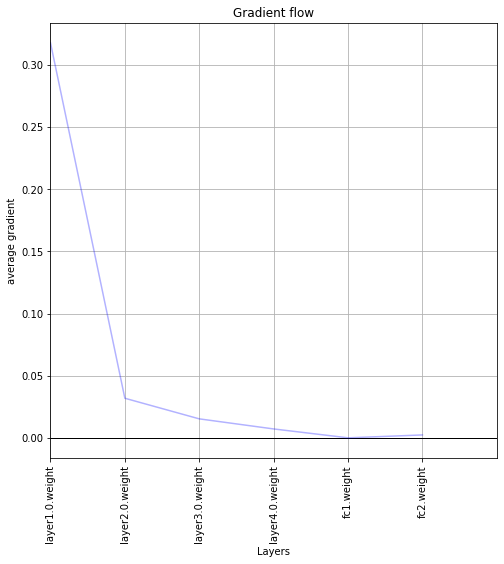

In [56]:
from functions.plot_model import plot_grad_flow
layers = []
for n, p in model.named_parameters():
    if(p.requires_grad) and ("bias" not in n):
        layers.append(n)
fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.xlabel("mini batch")
plt.ylabel("Average Gradient")
plt.title("Gradient Flow")
plt.grid(True)

plot_grad_flow(model.named_parameters())

In [60]:
len(losses_d_cnn)

2350

###Stack all results in graph and dataframe

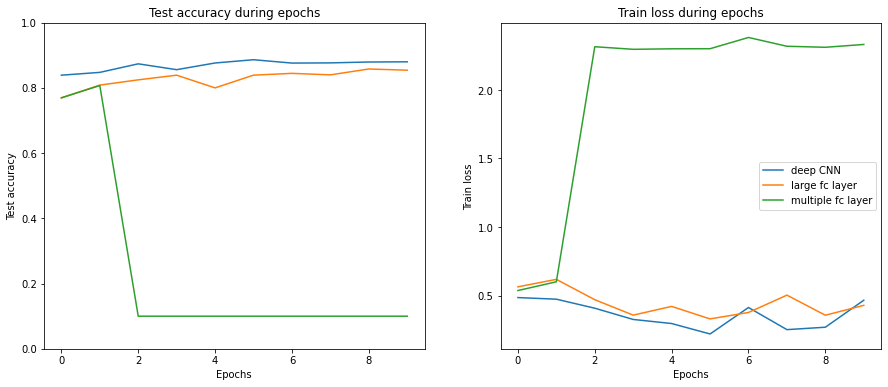

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,6))

ax1.plot(np.arange(EPOCHS), accuracies_d_cnn)
ax1.plot(np.arange(EPOCHS), accuracies_big_fc)
ax1.plot(np.arange(EPOCHS), accuracies_m_fc)
ax2.plot(np.arange(EPOCHS), filter_losses(losses_d_cnn, EPOCHS), label="deep CNN")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_big_fc, EPOCHS), label="large fc layer")
ax2.plot(np.arange(EPOCHS), filter_losses(losses_m_fc, EPOCHS), label="multiple fc layer")
ax1.set_ylim(0,1)
ax1.set_title("Test accuracy during epochs")
ax2.set_title("Train loss during epochs")

for ax in [ax1, ax2]:
  ax.set_xlabel("Epochs")

ax1.set_ylabel("Test accuracy")
ax2.set_ylabel("Train loss")

plt.legend(loc='center right')
